| Mode | Meaning                          |
|-------|---------------------------------|
| r     | read text (error if missing)    |
| w     | write text (create/overwrite)   |
| a     | append text (create if missing) |
| x     | create text (error if exists)   |
| +     | add read/write (combine like r+, w+, a+) |
| b     | binary (combine: rb, wb, ab)    |


### **open() basics**

In [53]:
# open(file, mode='r', buffering=-1, encoding=None, newline=None)
# mode: 'r' read, 'w' write(truncate), 'a' append, '+' read/write combo, 'b' binary, 't' text(default)

f = open("sourcefile/notes.txt","r",encoding="utf-8")
text = f.read()
f.close()

**--- Recommended: context manager (auto-close) ---**

In [54]:

with open("sourcefile/notes.txt","r",encoding="utf-8") as f:
    text = f.read()  # file closed automatically here

**--- Write (overwrite) ---**

In [55]:
with open("out.txt", "w", encoding="utf-8") as f:  # 'w' creates/truncates
    f.write("Hello\n")  # returns number of chars written

**--- Append ---**

In [56]:
with open("sourcefile/out.txt","a",encoding="utf-8") as f:
    f.write("More lines\n")

**--- Read/Write combo ---**

In [57]:
# --- Read/Write combo ---
# Open the file "data.txt" in read/write mode ("r+").
# The encoding is specified as UTF-8, which is standard for handling text files with non-ASCII characters.
# The file must already exist, otherwise a FileNotFoundError will be raised.
with open("sourcefile/data.txt", "r+", encoding="utf-8") as f:  # Opening the file in read/write mode (r+)
    
    # Read the current content of the file and store it in the 'content' variable.
    # The read() method reads the entire file content as a string.
    content = f.read()  
    
    # Move the file pointer (cursor) back to the start of the file (position 0).
    # This allows us to overwrite from the beginning of the file.
    f.seek(0)  # Move cursor to the beginning of the file
    
    # Write the string "HEADER\n" at the beginning of the file,
    # followed by the original content of the file that was read earlier.
    # The \n adds a new line after the "HEADER" text.
    f.write("HEADER\n" + content)  # Write "HEADER" and the existing file content back into the file


**--- Binary modes (no encoding/newline translation) ---**

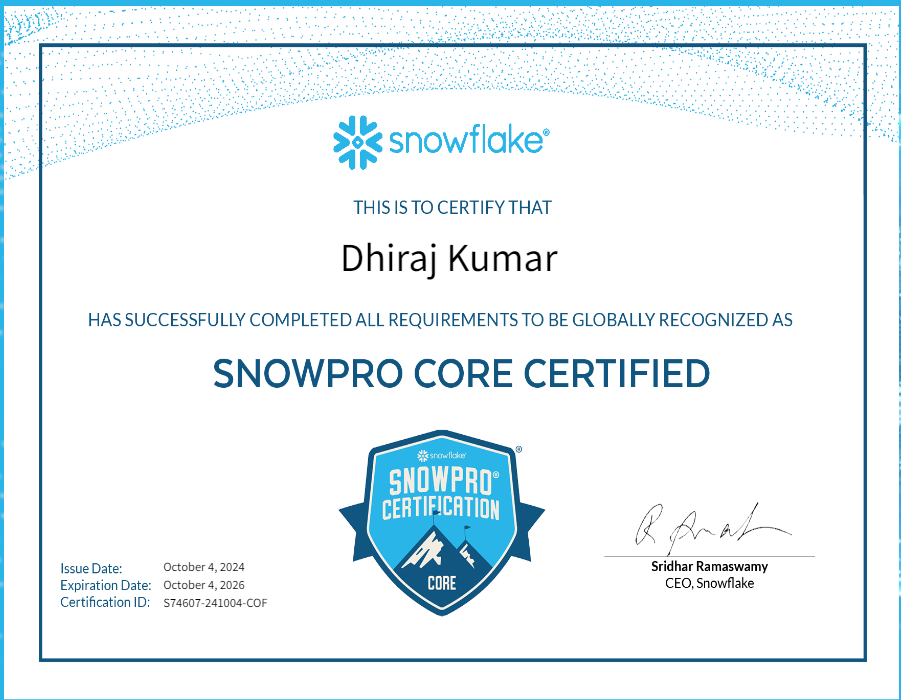

In [58]:
# Import the Image class and display function from IPython.display module
# - Image: used to create an image object that can be displayed in Jupyter notebooks
# - display: function that outputs the image object so it renders inline in the notebook
from IPython.display import Image, display

# Open the image file "sp.png" located inside the "sourcefile" folder in binary read mode ("rb")
# Binary mode is necessary because image files contain non-text binary data
with open("sourcefile/sp.png", "rb") as f:
    # Read the entire content of the file into the variable 'blob' as bytes
    blob = f.read()

# Create an Image object using the binary data stored in 'blob'
# Then use display() to render and show the image inline in the Jupyter notebook output cell
display(Image(data=blob))

In [59]:
# Open (or create) a file named "copy.png" in write-binary mode ("wb").
# - "wb" means write binary, which is needed when writing binary data like images.
# If the file already exists, it will be overwritten.
with open("sourcefile/copy.png", "wb") as f:
    
    # Write the binary data stored in 'blob' to the file.
    # This saves the image data to "copy.png" on disk.
    f.write(blob)

### **Reading methods**

In [60]:
# Open the file "notes.txt" in read mode ("r") with UTF-8 encoding
with open("sourcefile/notes.txt", "r", encoding="utf-8") as f:
    
    # Read the entire content of the file into a single string variable 'all_text'
    all_text = f.read()        
    print("Full file content:\n", all_text)
    
    # Move the file cursor back to the beginning to re-read or read differently
    f.seek(0)                  

    # Read a single line from the file
    line = f.readline()        
    print("\nFirst line read with readline():", repr(line))  # repr to show newline characters

    # Reset cursor again to the beginning of the file
    f.seek(0)

    # Read all lines into a list
    lines = f.readlines()      
    print("\nList of all lines read with readlines():", lines)

    # Reset cursor again to the beginning for iteration
    f.seek(0)

    # Efficient iteration over large files: line-by-line streaming
    print("\nIterating over file line-by-line:")
    for line in f:             
        line = line.rstrip("\n")  # Remove trailing newline
        print("Processed line:", repr(line))


Full file content:
 Line 1: Hello
Line 2: Learning Python file handling
Line 3: End


First line read with readline(): 'Line 1: Hello\n'

List of all lines read with readlines(): ['Line 1: Hello\n', 'Line 2: Learning Python file handling\n', 'Line 3: End\n']

Iterating over file line-by-line:
Processed line: 'Line 1: Hello'
Processed line: 'Line 2: Learning Python file handling'
Processed line: 'Line 3: End'


### **Writing methods & newline handling**

In [61]:
# Open "log.txt" in write-text mode ("w") with UTF-8 encoding
# The 'newline="\n"' argument forces Python to write newline characters as LF ('\n') regardless of OS
# Without this, on Windows, '\n' would be translated to CRLF ('\r\n')
with open("sourcefile/log.txt", "w", encoding="utf-8", newline="\n") as f:
    # Write a single line with explicit newline '\n' at the end
    # Because of newline="\n", this writes exactly '\n' (LF), no translation
    f.write("first\n")
    
    # Write multiple lines using writelines()
    # writelines() expects an iterable of strings and does NOT add newlines automatically,
    # so each string must include '\n' if a newline is desired
    f.writelines(["second\n", "third\n"])

# Now, open the file again in read mode to verify what was written
with open("sourcefile/log.txt", "r", encoding="utf-8") as f:
    # Read entire content of the file into a string
    content = f.read()

# Print the content using repr() to show special characters like '\n' explicitly
# This helps verify the exact newline characters in the file
print("Content of log.txt (repr shows special chars):")
print(repr(content))

Content of log.txt (repr shows special chars):
'first\nsecond\nthird\n'


### **File cursor: tell(), seek()**

Create a sample text file big.txt

In [62]:
# Create a sample text file named "big.txt" with multiple lines for testing

with open("sourcefile/big.txt", "w", encoding="utf-8") as f:
    f.write("Line 1\nLine 2\nLine 3\n" * 100)  # 300+ lines repeated to make file reasonably big

Your binary file reading and cursor operations, with detailed comments:

In [63]:
# Open "big.txt" in binary mode ("rb") to avoid any newline translation by the OS
# Binary mode reads raw bytes exactly as stored in the file
with open("sourcefile/big.txt", "rb") as f:
    
    # Get the current file cursor position (offset in bytes from the start)
    # Initially, this will be 0 since the file is just opened
    pos = f.tell()
    print("Initial cursor position:", pos)
    
    # Read the next 1024 bytes from the current position
    # This reads a chunk of the file data into 'chunk' as bytes
    chunk = f.read(1024)
    print("Read chunk size (bytes):", len(chunk))
    
    # Move the cursor back to the start of the file (byte offset 0)
    f.seek(0)
    print("Cursor position after seek(0):", f.tell())
    
    # Move the cursor 10 bytes forward relative to the current position (which is now at 0)
    # whence=1 means "from current position"
    f.seek(10, 1)
    print("Cursor position after seek(10, 1):", f.tell())
    
    # Move the cursor to the end of the file
    # whence=2 means "from the end of the file"
    f.seek(0, 2)
    print("Cursor position at end of file:", f.tell())

Initial cursor position: 0
Read chunk size (bytes): 1024
Cursor position after seek(0): 0
Cursor position after seek(10, 1): 10
Cursor position at end of file: 2400


### **Encodings—very important**

In [64]:
# Create the file with some initial content (or leave empty)
with open("sourcefile/data_utf8.txt", "w", encoding="utf-8") as f:
    f.write("This is some valid UTF-8 text.\n")

# Always be explicit about encoding when dealing with text
# This helps avoid issues that arise from relying on the platform's default encoding,
# which may vary across operating systems (e.g., UTF-8 on Linux/macOS, cp1252 on Windows).
# By specifying `encoding="utf-8"`, we ensure consistent interpretation of the file content.
with open("sourcefile/data_utf8.txt", "r", encoding="utf-8") as f:
    s = f.read()  # Read the entire file contents into a string, assuming it's valid UTF-8


with open("sourcefile/maybe_utf8.txt", "w", encoding="utf-8") as f:
    s = f.write("This is some valid utf")  # Read the file content, replacing any invalid bytes with '�'


# Robust decode when you don't fully trust file encoding
# If you're not sure the file is entirely valid UTF-8, or it may contain corrupt or unexpected byte sequences,
# you can use the `errors="replace"` parameter to handle decoding errors gracefully.
# This prevents your program from crashing with a UnicodeDecodeError.
# Invalid byte sequences will be replaced with the Unicode replacement character: '�'
with open("sourcefile/maybe_utf8.txt", "r", encoding="utf-8", errors="replace") as f:
    s = f.read()  # Read the file content, replacing any invalid bytes with '�'


**Exceptions & safety**

In [65]:
try:
    with open("missing.txt", "r", encoding="utf-8") as f:
        print(f.read())
except FileNotFoundError:
    print("File not found")
except PermissionError:
    print("No permission to read")
except OSError as e:
    print("Generic OS error:", e)

File not found


**File Operation File**

In [66]:
# Open the file "example.txt" in read mode ("r") located in the "sourcefile" directory
with open("sourcefile/example.txt", "r") as file:
    # Read the entire content of the file into the variable 'content'
    content = file.read()
    
    # Print the content of the file to the console
    print(content)

Hello World!
this is new lineHello World!
Append operation taking a place!FistLine
SecondLine
ThirdLine
FistLine
SecondLine
ThirdLine
Hello World!
Append operation taking a place!

FistLine
SecondLine
ThirdLine

FistLineSecondLine
ThirdLine
FistLineSecondLine
ThirdLine
Hello World!
Append operation taking a place!
FistLineSecondLine
ThirdLine
FistLine
SecondLine
ThirdLine



In [67]:
# Read content line by line

# Open the file "example.txt" in read mode ("r") from the "sourcefile" directory
with open("sourcefile/example.txt", "r") as file:
    # Iterate over each line in the file
    for line in file:
        # Print the current line
        print(line.strip())

Hello World!
this is new lineHello World!
Append operation taking a place!FistLine
SecondLine
ThirdLine
FistLine
SecondLine
ThirdLine
Hello World!
Append operation taking a place!

FistLine
SecondLine
ThirdLine

FistLineSecondLine
ThirdLine
FistLineSecondLine
ThirdLine
Hello World!
Append operation taking a place!
FistLineSecondLine
ThirdLine
FistLine
SecondLine
ThirdLine


In [68]:
# Write a file(Overwriting)

# Open the file "example.txt" in write mode ("w") in the "sourcefile" directory
# This will create the file if it doesn't exist, or overwrite it if it does
with open("sourcefile/example.txt", "w") as file:
    # Write the first line to the file, including a newline character at the end
    file.write("Hello World!\n")
    
    # Write a second line (note: no newline at the end, so next write would continue on the same line)
    file.write("this is new line")


In [69]:
# Writing to a file without overwriting existing content

# Open the file "example.txt" in append mode ("a") in the "sourcefile" directory
# This mode adds new content to the end of the file without erasing existing data
with open("sourcefile/example.txt", "a") as file:
    # Append a line with a newline character at the end
    file.write("Hello World!")
    
    # Append another line (note: no newline at the end, so it will continue on the same line if followed by another write)
    file.write("Append operation taking a place!\n")


In [70]:
# Create a list of lines to write to the file
lines = ['FistLine\n', 'SecondLine\n', 'ThirdLine\n']

# Open the file in append mode ('a') and write the lines
# If the file doesn't exist, it will be created
with open("sourcefile/example.txt", 'a') as file:
    file.writelines(lines)  # Write all lines to the file at once


In [71]:
# Define binary data as a bytes object
data = b'\x00\x01\x02\x03\x04'

# Open a binary file in write mode ('wb') — this will create the file if it doesn't exist,
# or overwrite it if it does
with open('sourcefile/example.bin', 'wb') as file:
    file.write(data)  # Write the binary data to the file

In [72]:
# Open the binary file in read mode ('rb')
with open('sourcefile/example.bin', 'rb') as file:
    content = file.read()  # Read the binary data from the file
    print(content)  # Print the content to the console


b'\x00\x01\x02\x03\x04'


In [73]:
# Open the source file in read mode
with open("sourcefile/example.txt", "r") as source_file:
    # Read the entire content of the source file
    content = source_file.read()

# Open the destination file in write mode
with open("sourcefile/destination.txt", "w") as destination_file:
    # Write the content read from the source file into the destination file
    destination_file.write(content)

In [4]:
# Read a text file and count the number of lines, words and characters.
def count_text_file(file_path):
    with open(file_path,'r') as file:
        lines = file.readlines()
        line_count = len(lines)
        word_count = sum(len(line.split()) for line in lines)
        char_count = sum(len(line) for line in lines)
    return line_count, word_count, char_count

file_path = 'sourcefile/example.txt'
lines, words, characters = count_text_file(file_path)
print(f"lines:{lines}, Words: {words}, Characters:{characters}")

lines:5, Words: 14, Characters:104


In Python, 'w+' mode opens a file for both reading and writing. If the file doesn’t exist, it will be created. If it does exist, its content will be erased. You can write to the file and then read from it, but you’ll need to move the file pointer (using seek()) to read what you wrote

In [14]:
# Open the file 'example.txt' in the 'sourcefile' directory
# Mode "w+" means:
# - Open the file for both writing and reading
# - Create the file if it does not exist
# - Truncate (erase) the file if it already exists
with open("sourcefile/example.txt", "w+") as file:

    # Write a line to the file
    file.write("Hello World\n")

    # Write another line to the file
    file.write("This is a new line\n")

    # After writing, the file cursor is at the end of the file
    # To read what we've written, move the cursor back to the beginning
    file.seek(0)

    # Read the entire contents of the file into the variable 'content'
    content = file.read()

# At this point, the 'with' block has closed the file automatically
# Print the content that was read from the file
print(content)

Hello World
This is a new line

